In [90]:
import cv2, numpy as np, matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
from skimage import io
from skimage.segmentation import active_contour
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


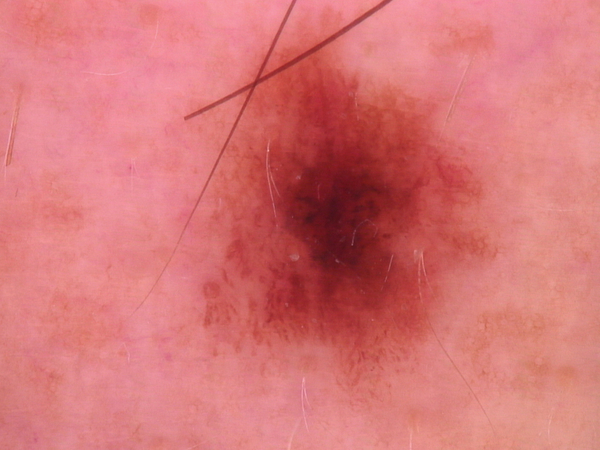

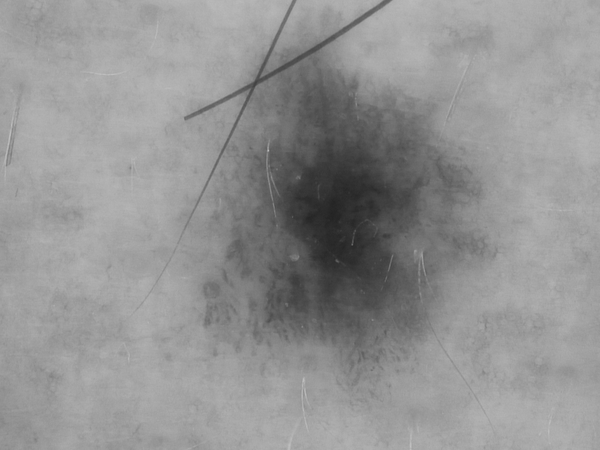

In [91]:
img = cv2.imread('/content/gdrive/MyDrive/test.jpg', cv2.IMREAD_COLOR)
cv2_imshow(img)
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayImg)

# Baseada em região

In [92]:
softenedImg = cv2.GaussianBlur(grayImg, (5, 5), 0) # Apply softened filter to reduce noise
_, mask = cv2.threshold(softenedImg, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) # Thresholding algorithm to create mask

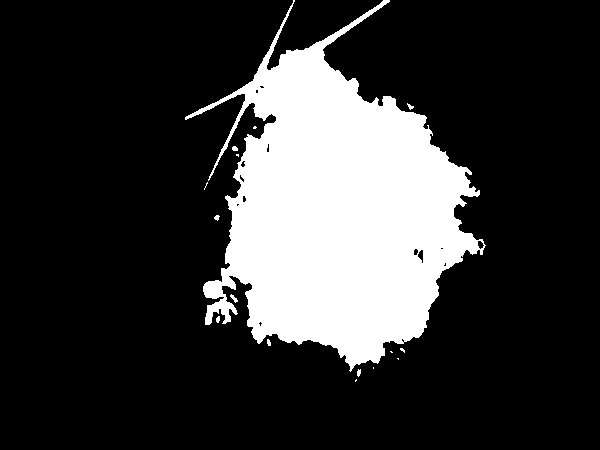

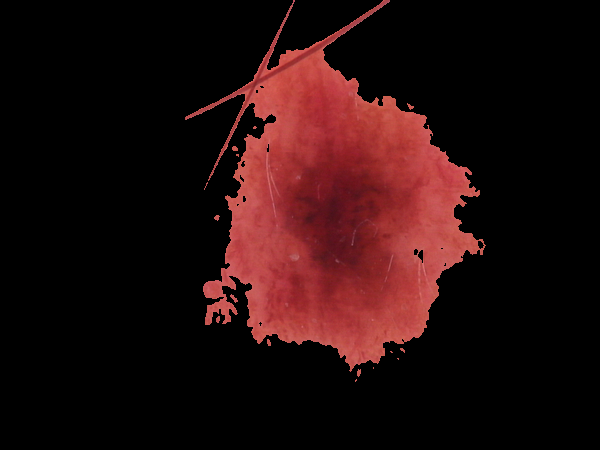

In [93]:
segmentedImg = img.copy() # Copy img to preserve pixels

# Apply mask
segmentedImg[:, :, 0] = cv2.bitwise_and(img[:, :, 0], mask)
segmentedImg[:, :, 1] = cv2.bitwise_and(img[:, :, 1], mask)
segmentedImg[:, :, 2] = cv2.bitwise_and(img[:, :, 2], mask)

cv2_imshow(mask)
cv2_imshow(segmentedImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

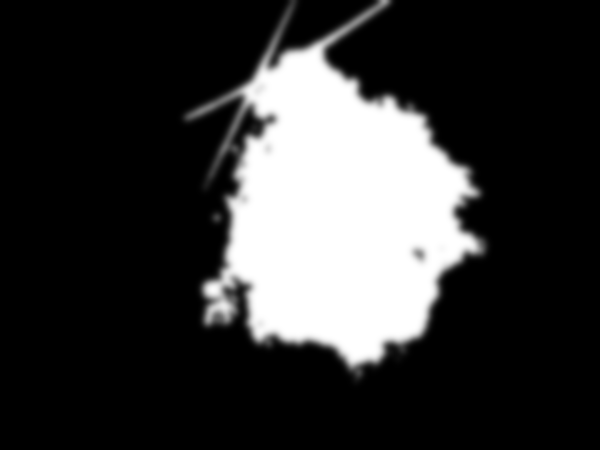

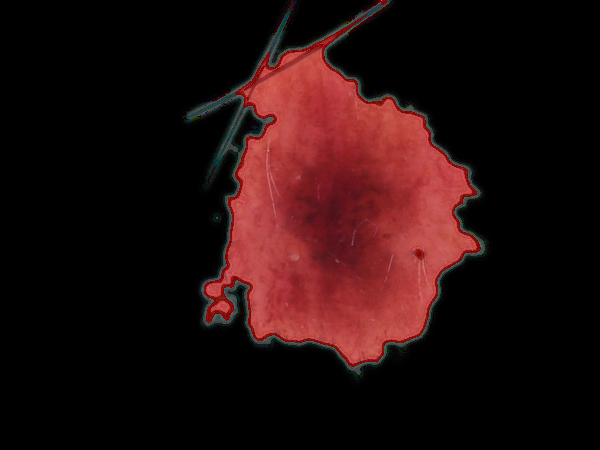

In [94]:
softenedMask = cv2.GaussianBlur(mask, (21, 21), 0) # Smoothing filter

segmentedImg = img.copy() # Copy img to preserve pixels

# Apply mask
segmentedImg[:, :, 0] = cv2.bitwise_and(img[:, :, 0], softenedMask)
segmentedImg[:, :, 1] = cv2.bitwise_and(img[:, :, 1], softenedMask)
segmentedImg[:, :, 2] = cv2.bitwise_and(img[:, :, 2], softenedMask)

cv2_imshow(softenedMask)
cv2_imshow(segmentedImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

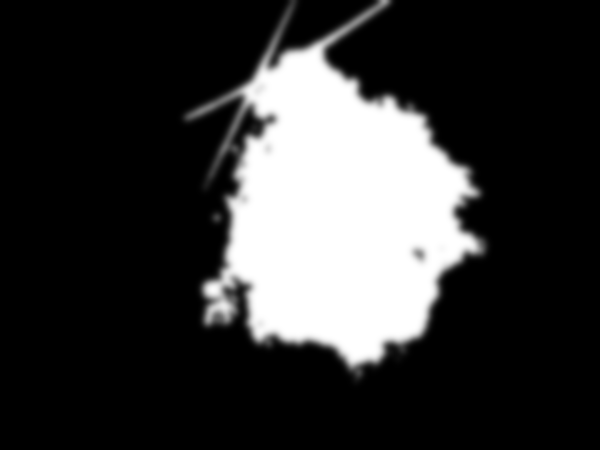

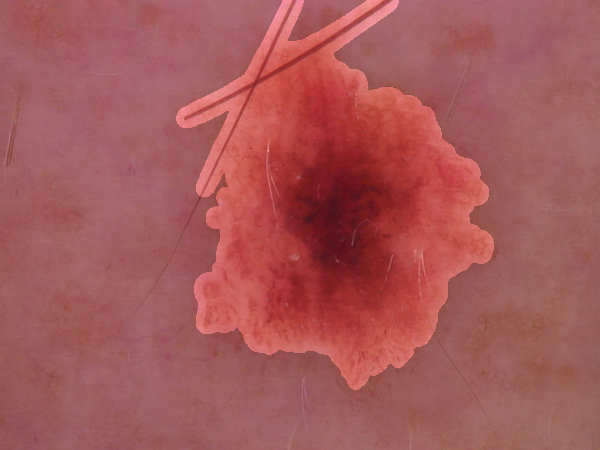

In [95]:
softenedMask = cv2.GaussianBlur(mask, (21, 21), 0) # Smoothing filter

segmentedImg = img.copy() # Copy img to preserve pixels

# Apply mask
segmentedImg = cv2.bitwise_and(img, img, mask=softenedMask)

# Merge segmented image and original image weighted
alpha = 0.7  # Weight for segmented image
beta = 1.0 - alpha  # Weight for original image
mergedImg = cv2.addWeighted(img, alpha, segmentedImg, beta, 0)

cv2_imshow(softenedMask)
cv2_imshow(mergedImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Baseada em borda

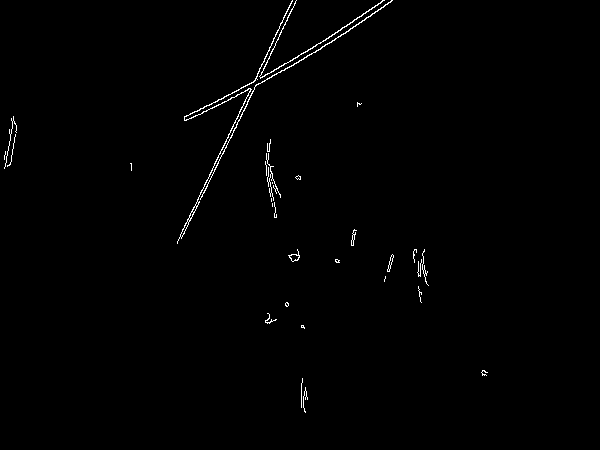

In [96]:
edges = cv2.Canny(grayImg, 50, 150) # Detect borders

cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

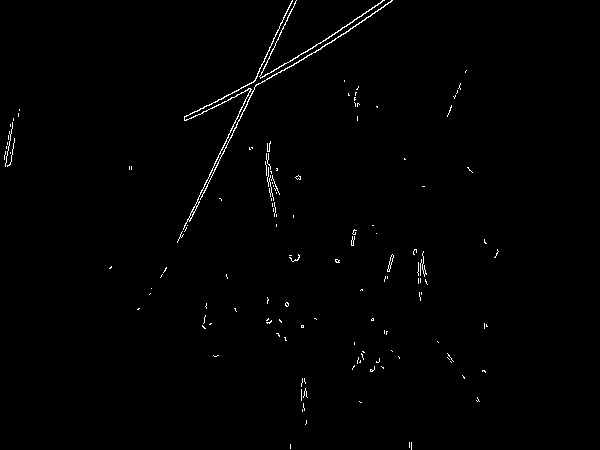

In [97]:
edges = cv2.Canny(grayImg, 100, 80) # Detect borders

cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Baseada em região ativa

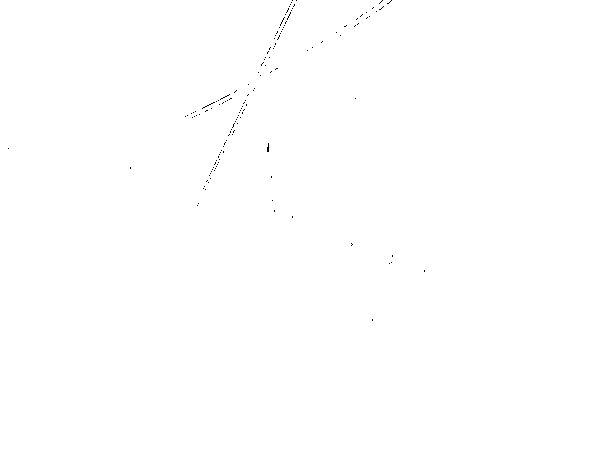

In [98]:
seed = (100, 100) # Select one seed point (active region)

segmentedImg = np.zeros_like(grayImg) # Apply region growth
queue = [seed]
while queue:
    x, y = queue.pop(0)
    if segmentedImg[x, y] == 0:
        segmentedImg[x, y] = 255
        for i in range(x-1, x+2):
            for j in range(y-1, y+2):
                if i >= 0 and i < img.shape[0] and j >= 0 and j < img.shape[1] and \
                   abs(int(grayImg[i, j]) - int(grayImg[x, y])) <= 10:
                    queue.append((i, j))

cv2_imshow(segmentedImg)
cv2.waitKey(0)
cv2.destroyAllWindows()